In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Extracting Test Data

The pre-trained model (modelnet40_complete/813(airplane)) evaluated on 
1. modelnet40_complete(airplane)
2. shapenet.real.hard.airplane
3. shapenet.real.medium.airplane
4. shapenet.real.easy.airplane

In [2]:
labels = ["modelnet40_complete", 
          "shapenet.sim.easy",
          "shapenet.sim.medium",
          "shapenet.sim.hard"
         ]

files = []
# dataset: modelnet40_complete (airplane)
files.append("../equi-pose/runs/Dec08_17-15-26_spark-agent/eval_data.pkl")

# dataset: shapenet.sim.easy (airplane)
files.append("../equi-pose/runs/Dec08_17-29-29_spark-agent/eval_data.pkl")

# dataset: shapenet.sim.medium (airplane)
files.append("../equi-pose/runs/Dec08_17-39-14_spark-agent/eval_data.pkl")

# dataset: shapenet.sim.hard (airplane)
files.append("../equi-pose/runs/Dec08_18-21-33_spark-agent/eval_data.pkl")


In [3]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
#     print(eval_data.data["adds"])
    
    eval_data.complete_eval_data()
    data[label] = eval_data.data

label:  modelnet40_complete
loading file:  ../equi-pose/runs/Dec08_17-15-26_spark-agent/eval_data.pkl
label:  shapenet.sim.easy
loading file:  ../equi-pose/runs/Dec08_17-29-29_spark-agent/eval_data.pkl
label:  shapenet.sim.medium
loading file:  ../equi-pose/runs/Dec08_17-39-14_spark-agent/eval_data.pkl
label:  shapenet.sim.hard
loading file:  ../equi-pose/runs/Dec08_18-21-33_spark-agent/eval_data.pkl


IndexError: index -1 is out of bounds for axis 0 with size 0

## ADD-S and ADD-S (AUC)

In [4]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet40_complete,shapenet.sim.easy,shapenet.sim.medium
adds_th_score,0.910000,0.249219,0.015625
adds_auc,0.772252,0.325673,0.034206


## Distribution of Error Metrics

In [5]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [6]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

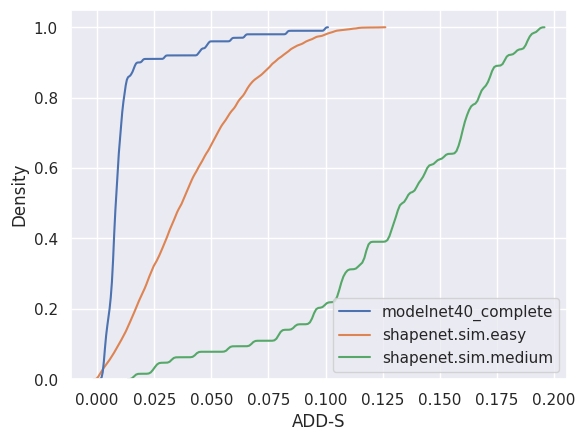

In [7]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [8]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [9]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

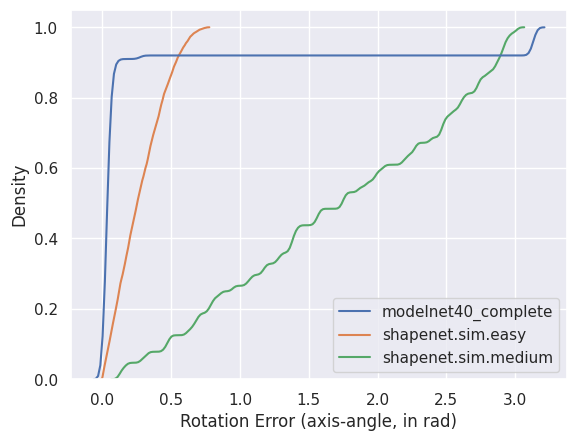

In [10]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [11]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [12]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

/tmp/ipykernel_7379/1378228983.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)


Text(0.5, 0, 'Translation Error')

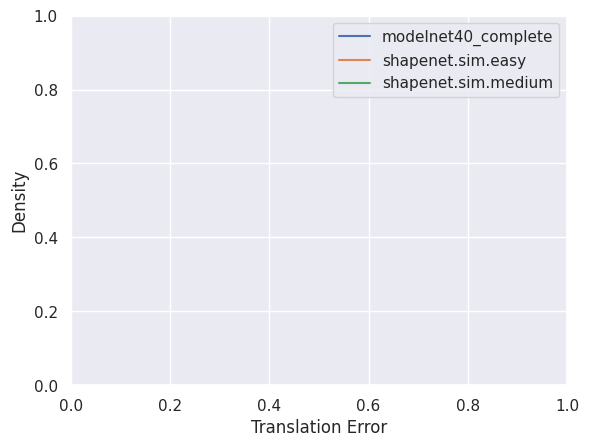

In [13]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Conclusion

1. To be written.